# Download dataset

In [1]:
!git clone https://github.com/duyvuleo/VNTC.git

Cloning into 'VNTC'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39 (from 1)
Receiving objects: 100% (39/39), 160.90 MiB | 40.34 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (15/15), done.


In [2]:
!apt install unrar > /dev/null

In [3]:
!unrar x -inul /kaggle/working/VNTC/Data/27Topics/Ver1.1/Train.rar /kaggle/working/data/train/

In [4]:
!unrar x -inul /kaggle/working/VNTC/Data/27Topics/Ver1.1/Test.rar /kaggle/working/data/test/

In [5]:
!ls /kaggle/working/data/

test  train


In [6]:
!ls "/kaggle/working/data/train/new train/"

'Am nhac'	    'Duong vao WTO'	  'Lam dep'
'Am thuc'	    'Gia dinh'		  'Loi song'
'Bat dong san'	    'Giai tri tin hoc'	  'Mua sam'
'Bong da'	    'Giao duc'		  'My thuat'
'Chung khoan'	    'Gioi tinh'		  'San khau dien anh'
'Cum ga'	    'Hackers va Virus'	  'San pham tin hoc moi'
'Cuoc song do day'  'Hinh su'		   Tennis
'Du hoc'	    'Khong gian song'	  'The gioi tre'
'Du lich'	    'Kinh doanh quoc te'  'Thoi trang'


In [7]:
!ls "/kaggle/working/data/test/new test/"

'Am nhac'	    'Duong vao WTO'	  'Lam dep'
'Am thuc'	    'Gia dinh'		  'Loi song'
'Bat dong san'	    'Giai tri tin hoc'	  'Mua sam'
'Bong da'	    'Giao duc'		  'My thuat'
'Chung khoan'	    'Gioi tinh'		  'San khau dien anh'
'Cum ga'	    'Hackers va Virus'	  'San pham tin hoc moi'
'Cuoc song do day'  'Hinh su'		   Tennis
'Du hoc'	    'Khong gian song'	  'The gioi tre'
'Du lich'	    'Kinh doanh quoc te'  'Thoi trang'


In [8]:
!ls "/kaggle/working/data/train/new train/Am nhac" | head -3

AN_TN_ (878).txt
AN_TN_ (879).txt
AN_TN_ (880).txt


# Import

In [9]:
!pip install -q underthesea

In [45]:
import os
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from underthesea import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
from transformers import AutoModel, AutoTokenizer
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing data

In [11]:
TRAIN_DIR='/kaggle/working/data/train/new train/'
TEST_DIR='/kaggle/working/data/test/new test/'

In [12]:
X_train, X_test, y_train, y_test = [], [], [], []
for cat in os.listdir(TRAIN_DIR):
    cat_path = os.path.join(TRAIN_DIR, cat)
    for text_file in os.listdir(cat_path):
        f = open(os.path.join(cat_path, text_file), 'r', encoding='utf-16')
        text = f.read()
        X_train.append(text)
        y_train.append(cat)
        
for cat in os.listdir(TEST_DIR):
    cat_path = os.path.join(TEST_DIR, cat)
    for text_file in os.listdir(cat_path):
        f = open(os.path.join(cat_path, text_file), 'r', encoding='utf-16')
        text = f.read()
        X_test.append(text)
        y_test.append(cat)

In [13]:
X_train[0]

'OPEC hứa bình ổn giá dầu\nGiám đốc Tổ chức xuất khẩu dầu mỏ (OPEC) Sheikh Ahmad Fahd al-Sabah vừa tuyên bố, nếu giá dầu tiếp tục tăng cao, tổ chức này sẽ nâng sản lượng dầu khai thác nhằm tránh một cuộc khủng hoảng năng lượng như hồi năm ngoái. \nCho đến thời điểm này, người ta vẫn không thể quên được cuộc bão giá năng lượng trong năm 2004. Có lúc giá dầu thô trên thị trường thế giới đã lên tới gần 60 USD/thùng. Và để hạ nhiệt cơn sốt giá dầu nóng bỏng đó, OPEC đã phải ra tay bình ổn bằng cách nâng sản lượng khai thác.\n"Giá dầu tăng có thể có lợi cho OPEC bởi chúng tôi nằm trong số những nhà xuất khẩu dầu lớn nhất thế giới. Tuy nhiên, một trong những mục tiêu của chúng tôi là đảm bảo ổn định nguồn cung và không để giá dầu tăng quá cao đến mức gây \'sốt\' như năm ngoái. OPEC sẽ tăng sản lượng khai thác dầu thô để tránh khả năng này", ông Ahmad Fahd khẳng định. \nTuyên bố trên của người đứng đầu OPEC được phát đi trong bối cảnh thị trường dầu lửa bắt đầu có dấu hiệu nóng bỏng. Dầu thô 

In [14]:
y_train[0]

'Kinh doanh quoc te'

In [15]:
print(len(X_train))
print(len(X_test))

14375
12076


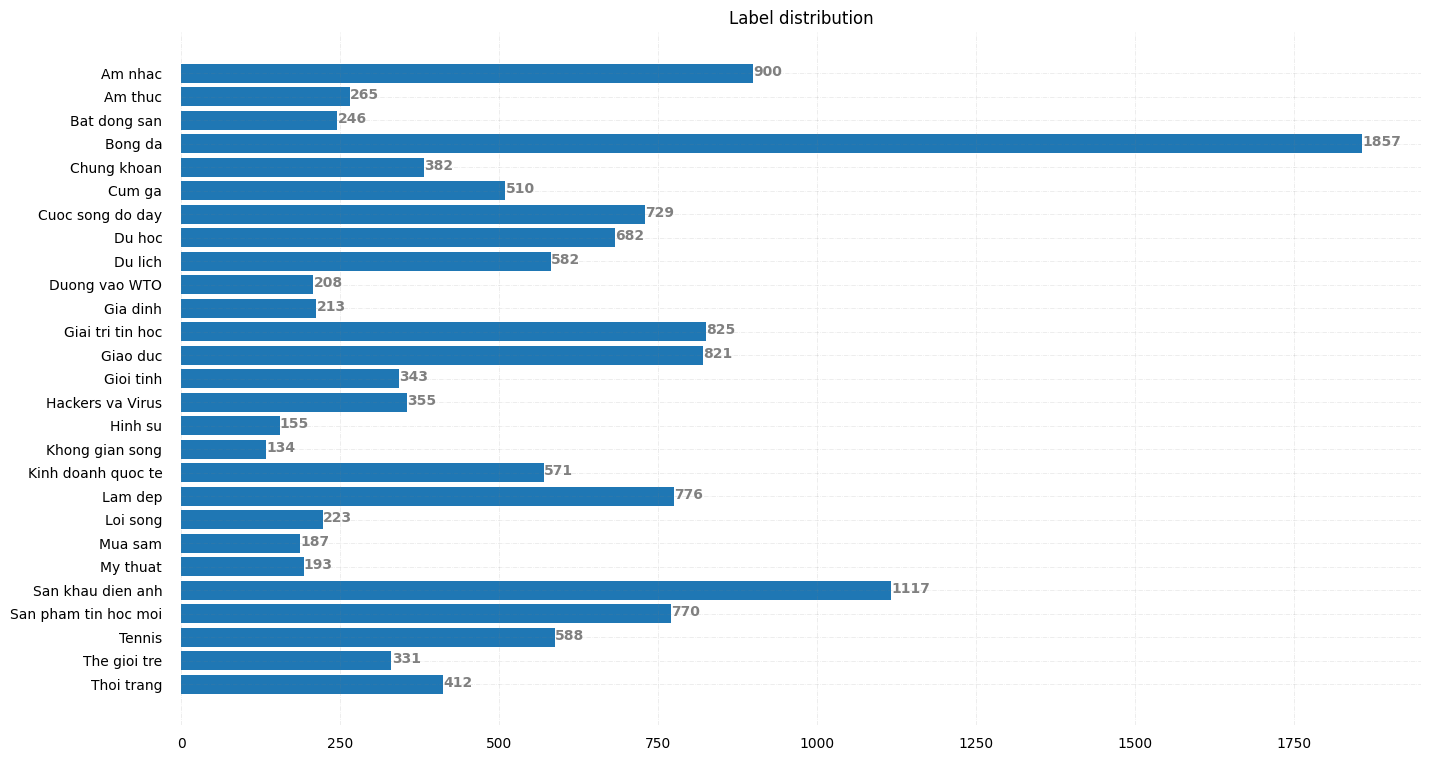

In [16]:
unique, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(unique, counts)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Label distribution')

plt.show()

In [17]:
print(len(unique))

27


# Preprocessing data

In [18]:
def normalize(text):
    # remove html
    text = re.sub(r'<[^>]*>', '', text)
    
    # remove punctuation
    text = re.sub(f'[{string.punctuation}—℅\d]', '', text)
    
    # remove end line
    text = re.sub(f'[\n]', ' ', text)
    
    # lowercase
    text = text.lower()
    
    # remove redundant white space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [19]:
X_train = [normalize(text) for text in X_train]
X_test = [normalize(text) for text in X_test]

In [20]:
X_train[0]

'opec hứa bình ổn giá dầu giám đốc tổ chức xuất khẩu dầu mỏ opec sheikh ahmad fahd alsabah vừa tuyên bố nếu giá dầu tiếp tục tăng cao tổ chức này sẽ nâng sản lượng dầu khai thác nhằm tránh một cuộc khủng hoảng năng lượng như hồi năm ngoái cho đến thời điểm này người ta vẫn không thể quên được cuộc bão giá năng lượng trong năm có lúc giá dầu thô trên thị trường thế giới đã lên tới gần usdthùng và để hạ nhiệt cơn sốt giá dầu nóng bỏng đó opec đã phải ra tay bình ổn bằng cách nâng sản lượng khai thác giá dầu tăng có thể có lợi cho opec bởi chúng tôi nằm trong số những nhà xuất khẩu dầu lớn nhất thế giới tuy nhiên một trong những mục tiêu của chúng tôi là đảm bảo ổn định nguồn cung và không để giá dầu tăng quá cao đến mức gây sốt như năm ngoái opec sẽ tăng sản lượng khai thác dầu thô để tránh khả năng này ông ahmad fahd khẳng định tuyên bố trên của người đứng đầu opec được phát đi trong bối cảnh thị trường dầu lửa bắt đầu có dấu hiệu nóng bỏng dầu thô loại nhẹ giao tháng trên thị trường ne

In [21]:
# tfidf = TfidfVectorizer(tokenizer=word_tokenize)
# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.transform(X_test)
# tfidf_features = tfidf.get_feature_names_out()
# print(tfidf_features)

In [22]:
X_train = [word_tokenize(doc, format='text') for doc in X_train]
X_test = [word_tokenize(doc, format='text') for doc in X_test]

In [23]:
X_train[0]

'opec hứa bình_ổn giá dầu giám_đốc tổ_chức xuất_khẩu dầu_mỏ opec sheikh ahmad fahd alsabah vừa tuyên_bố nếu giá dầu tiếp_tục tăng cao tổ_chức này sẽ nâng sản_lượng dầu khai_thác nhằm tránh một cuộc khủng_hoảng năng_lượng như hồi năm_ngoái cho đến thời_điểm này người ta vẫn không_thể quên được cuộc bão_giá năng_lượng trong năm có lúc giá dầu_thô trên thị_trường thế_giới đã lên tới gần usdthùng và để hạ nhiệt cơn_sốt_giá dầu nóng_bỏng đó opec đã phải ra_tay bình_ổn bằng cách nâng sản_lượng khai_thác giá dầu tăng có_thể có lợi cho opec bởi chúng_tôi nằm trong số những nhà_xuất_khẩu dầu lớn nhất thế_giới tuy_nhiên một trong những mục_tiêu của chúng_tôi là đảm_bảo ổn_định nguồn cung và không để giá dầu tăng quá cao đến mức gây sốt như năm_ngoái opec sẽ tăng sản_lượng khai_thác dầu_thô để tránh khả_năng này ông ahmad fahd khẳng_định tuyên_bố trên của người đứng đầu opec được phát đi trong bối_cảnh thị_trường dầu_lửa bắt_đầu có dấu_hiệu nóng_bỏng dầu_thô loại nhẹ giao tháng trên thị_trường ne

In [24]:
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2").to('cuda')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2").to('cuda')

def phobert_embedding(documents):
    embeddings = []
    for doc in documents:
        input_ids = tokenizer.encode(doc, return_tensors='pt', padding=True, truncation=True, max_length=256)
        with torch.no_grad():
            features = phobert(input_ids)
            embeddings.append(features.last_hidden_state.mean(dim=1).squeeze().tolist())
    return embeddings

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [25]:
X_train_embeddings = np.array(phobert_embedding(X_train))
X_test_embeddings = np.array(phobert_embedding(X_test))

In [26]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=27)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=27)

In [28]:
X_train_embeddings, X_valid_embeddings, y_train, y_val = train_test_split(X_train_embeddings, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [38]:
input_size = 768  
num_classes = 27

model = models.Sequential([
    layers.InputLayer(input_shape=(input_size,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,803 (796.11 KB)

 Trainable params: 203,803 (796.11 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train_embeddings, y_train, 
                    validation_data=(X_valid_embeddings, y_val), 
                    epochs=30, 
                    batch_size=32)

Epoch 1/30


I0000 00:00:1727539839.330430     242 service.cc:145] XLA service 0x7d467c009420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727539839.330484     242 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727539839.330488     242 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


110/405 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2521 - loss: 2.7763

I0000 00:00:1727539842.377197     242 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


405/405 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4709 - loss: 2.0240 - val_accuracy: 0.8623 - val_loss: 0.5652
Epoch 2/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.6175 - val_accuracy: 0.8755 - val_loss: 0.3946
Epoch 3/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.4512 - val_accuracy: 0.8992 - val_loss: 0.3328
Epoch 4/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8780 - loss: 0.3874 - val_accuracy: 0.8964 - val_loss: 0.3180
Epoch 5/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3583 - val_accuracy: 0.8915 - val_loss: 0.3106
Epoch 6/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.3105 - val_accuracy: 0.9026 - val_loss: 0.2997
Epoch 7/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.3115 - val_accuracy: 0.9033 - val_loss: 0.2945
Epoch 8/30
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9037 - loss: 0.2951 - val_accuracy: 0.9096 - val_

In [40]:
model.save('/kaggle/working/text_classify.h5')

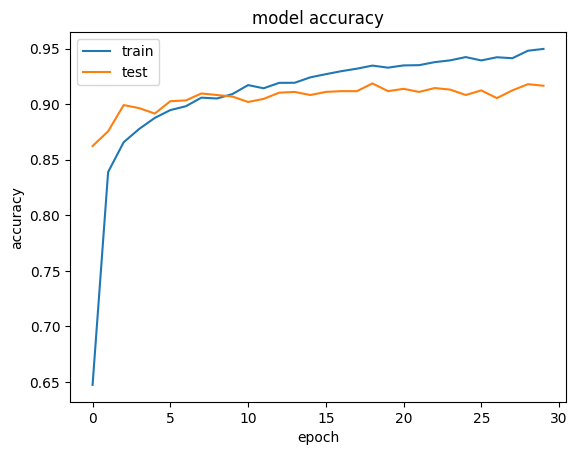

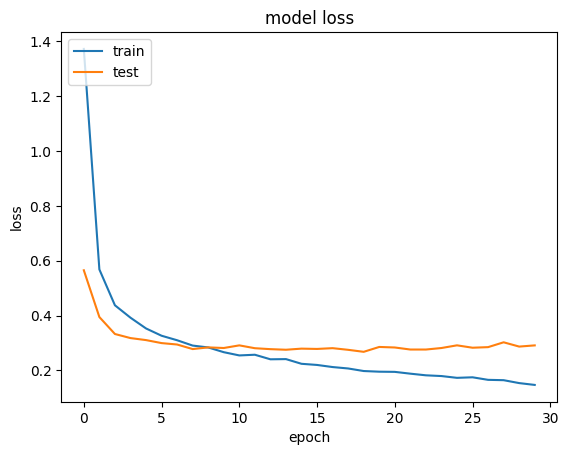

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
predictions = model.predict(X_test_embeddings)
y_pred = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8847300430606161


In [56]:
print(classification_report(y_test, y_pred, target_names=list(unique)))

                      precision    recall  f1-score   support

             Am nhac       0.86      0.94      0.90       813
             Am thuc       0.99      0.92      0.95       400
        Bat dong san       0.96      0.95      0.96       282
             Bong da       0.99      0.99      0.99      1464
         Chung khoan       0.99      0.94      0.96       320
              Cum ga       0.99      0.98      0.98       381
    Cuoc song do day       0.69      0.79      0.73       405
              Du hoc       0.95      0.93      0.94       394
             Du lich       0.90      0.93      0.92       565
       Duong vao WTO       0.85      0.83      0.84       191
            Gia dinh       0.74      0.61      0.67       280
    Giai tri tin hoc       0.75      0.82      0.78       707
            Giao duc       0.89      0.90      0.90       707
           Gioi tinh       0.93      0.82      0.87       268
    Hackers va Virus       0.97      0.86      0.91       319
       